In [1]:
import pandas as pd
import numpy as np
import src.generation.gamma as ga
import src.generation.multivariate_normal as mn
import src.generation.synthetic as sn
from src.generation.base.generator import BaseGenerator

import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
def calc(wrapper, cor: float, seed:float = None):
    generator = wrapper(cor, seed)
    vectors = generator.generate_cloud_load_vectors()
    cm = np.corrcoef(vectors)
    # return cm[cm != 1]
    return np.mean(cm[cm != 1]), np.sum(vectors)

In [3]:
def run_tests(wrapper, cor_rng = np.arange(0, 1.01, 0.05), repeats=100):
    result = []

    for cor in cor_rng:
        for sed in range(repeats):
            cr, ld= calc(wrapper, cor, sed)

            result.append((cor, cr, ld))
            sed += 1

    return pd.DataFrame(result, columns=['expected', 'actual', 'load'])

In [4]:
# params
N = 1000
F = N
size=100

In [5]:
def gamma_wrapper(cor: float, seed: float=None) -> BaseGenerator:
    # return ga.Generator(F, size, cor, (4,8), seed=seed)
    return ga.Generator(F, size, cor, (6,6), seed=seed)

def mn2_wrapper(cor: float, seed: float=None) -> BaseGenerator:
    # return mn.Generator2(F, size, cor, (8,16), (1,2), seed=seed)
    return mn.Generator2(F, size, cor, (12,12), (2,2), seed=seed)

def mn_wrapper(cor: float, seed: float=None) -> BaseGenerator:
    # return mn.Generator(F, size, cor, (8,16), (1,2), seed=seed)
    return mn.Generator(F, size, cor, (12,12), (2,2), seed=seed)

def syn_wrapper(cor: float, seed: float=None) -> BaseGenerator:
    return sn.Generator(F, size, seed)

# Time performance

In [6]:
%%timeit
fg = gamma_wrapper(0)

26.4 ms ± 3.52 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
%%timeit
fg = gamma_wrapper(0)
fg.generate_cloud_load_vectors()

85.6 ms ± 22.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
%%timeit
fm = mn_wrapper(0)

17.3 ms ± 411 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [9]:
%%timeit
fm = mn_wrapper(0)
fm.generate_cloud_load_vectors()

700 ms ± 160 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
%%timeit
fm2 = mn2_wrapper(0)

23.1 ms ± 2.44 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [11]:
%%timeit
fm2 = mn2_wrapper(0)
fm2.generate_cloud_load_vectors()

35 ms ± 2.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Tests

In [12]:
%%time
df_ga = run_tests(gamma_wrapper)

CPU times: user 10min 41s, sys: 9min 36s, total: 20min 18s
Wall time: 2min 52s


In [ ]:
# %%time
# df_mn = run_tests(mn_wrapper, repeats=50)

In [14]:
%%time
df_mn2 = run_tests(mn2_wrapper)

CPU times: user 11min 1s, sys: 9min 46s, total: 20min 48s
Wall time: 3min


In [16]:
%%time
df_sn = run_tests(syn_wrapper, cor_rng=np.arange(0,1))

CPU times: user 22.3 s, sys: 16.8 s, total: 39.1 s
Wall time: 5.98 s


In [15]:
# df_ga.to_csv('results/gamma-gen-100.csv', index=False)
# df_mn.to_csv('results/gamma-nor-100.csv', index=False)
# df_mn2.to_csv('results/gamma-nor2-100.csv', index=False)

# Plots

In [16]:
grped = df_ga.groupby('expected').agg({'actual': ['mean', 'count', 'std'], 'load': ['median', 'mean', 'count', 'std']})
# mnped = df_mn.groupby('expected').agg({'actual': ['mean', 'count', 'std'], 'load': ['median', 'mean', 'count', 'std']})
mnped2 = df_mn2.groupby('expected').agg({'actual': ['mean', 'count', 'std'], 'load': ['median', 'mean', 'count', 'std']})

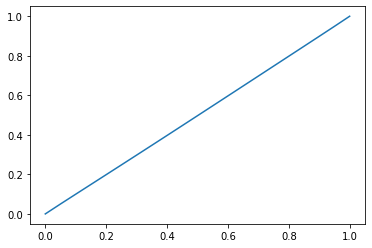

In [17]:
plt.plot(grped.index, grped.actual['mean'])
plt.show()

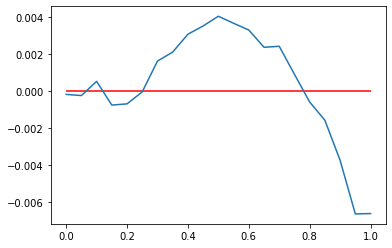

In [18]:
line = gamma_wrapper(0).get_estimated_cloud_load()
plt.plot(grped.index, (grped.load['median']-line)/line)
plt.hlines(0, 0, 1, colors="red")
plt.show()

In [19]:
# plt.plot(mnped.index, mnped.actual['mean'])
# plt.show()

In [20]:
# line = mn_wrapper(0).get_estimated_cloud_load()
# plt.plot(mnped.index, (mnped.load['median']-line)/line)
# plt.hlines(0, 0, 1, colors="red")
# plt.show()

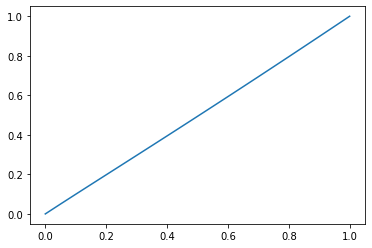

In [21]:
plt.plot(mnped2.index, mnped2.actual['mean'])
plt.show()

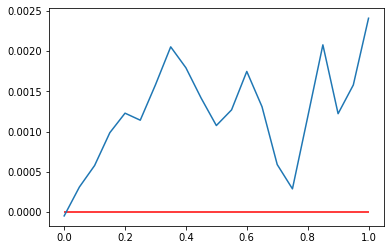

In [22]:
line = mn2_wrapper(0).get_estimated_cloud_load()
plt.plot(mnped2.index, (mnped2.load['median']-line)/line)
plt.hlines(0, 0, 1, colors="red")
plt.show()

In [23]:
grped

actual                              load                      \
              mean count           std        median          mean count   
expected                                                                   
0.00      0.000274   100  1.601120e-04  1.199793e+06  1.199705e+06   100   
0.05      0.050561   100  7.105041e-03  1.199718e+06  1.199114e+06   100   
0.10      0.100043   100  1.330992e-02  1.200640e+06  1.200175e+06   100   
0.15      0.149379   100  1.856375e-02  1.199101e+06  1.201359e+06   100   
0.20      0.198718   100  2.309008e-02  1.199179e+06  1.202474e+06   100   
0.25      0.248130   100  2.703319e-02  1.199959e+06  1.203458e+06   100   
0.30      0.297648   100  3.048556e-02  1.201954e+06  1.204283e+06   100   
0.35      0.347283   100  3.347107e-02  1.202542e+06  1.204930e+06   100   
0.40      0.397043   100  3.597224e-02  1.203699e+06  1.205389e+06   100   
0.45      0.446920   100  3.794313e-02  1.204236e+06  1.205647e+06   100   
0.50      0.496898   100  3.931238e-02  1.204866e+06  1.205694e+06   100   
0.55      0.546961   100  3.998953e-02  1.204410e+06  1.205519e+06   100   
0.60      0.597086   100  3.988563e-02  1.203973e+06  1.205110e+06   100   
0.65      0.647256   100  3.890226e-02  1.202852e+06  1.204453e+06   100   
0.70      0.697453   100  3.694949e-02  1.202916e+06  1.203535e+06   100   
0.75      0.747661   100  3.394197e-02  1.201099e+06  1.202342e+06   100   
0.80      0.797881   100  2.980952e-02  1.199300e+06  1.200860e+06   100   
0.85      0.848122   100  2.448396e-02  1.198116e+06  1.199076e+06   100   
0.90      0.898426   100  1.788551e-02  1.195517e+06  1.196983e+06   100   
0.95      0.948912   100  9.862348e-03  1.192036e+06  1.194621e+06   100   
1.00      1.000000   100  2.240999e-09  1.192060e+06  1.192636e+06   100   

                        
                   std  
expected                
0.00       2766.287376  
0.05      18119.729563  
0.10      24665.859339  
0.15      29722.323856  
0.20      34051.927351  
0.25      37951.880140  
0.30      41573.367408  
0.35      45004.896044  
0.40      48302.819268  
0.45      51506.421579  
0.50      54641.942265  
0.55      57728.517586  
0.60      60782.082358  
0.65      63815.764178  
0.70      66842.988035  
0.75      69880.217765  
0.80      72952.305508  
0.85      76099.587358  
0.90      79397.815620  
0.95      82945.614424  
1.00      87723.838643

In [24]:
# mnped

In [25]:
mnped2

actual                              load                      \
              mean count           std        median          mean count   
expected                                                                   
0.00      0.000272   100  1.469132e-04  1.199940e+06  1.199988e+06   100   
0.05      0.050277   100  7.336382e-03  1.200372e+06  1.200646e+06   100   
0.10      0.099761   100  1.351115e-02  1.200693e+06  1.200943e+06   100   
0.15      0.148947   100  1.886505e-02  1.201183e+06  1.201142e+06   100   
0.20      0.198004   100  2.340232e-02  1.201475e+06  1.201292e+06   100   
0.25      0.247037   100  2.717135e-02  1.201370e+06  1.201407e+06   100   
0.30      0.296122   100  3.023478e-02  1.201900e+06  1.201496e+06   100   
0.35      0.345307   100  3.264092e-02  1.202466e+06  1.201563e+06   100   
0.40      0.394623   100  3.441872e-02  1.202153e+06  1.201611e+06   100   
0.45      0.444092   100  3.558257e-02  1.201700e+06  1.201643e+06   100   
0.50      0.493722   100  3.612021e-02  1.201290e+06  1.201658e+06   100   
0.55      0.543526   100  3.601444e-02  1.201525e+06  1.201658e+06   100   
0.60      0.593509   100  3.523269e-02  1.202099e+06  1.201643e+06   100   
0.65      0.643678   100  3.373187e-02  1.201572e+06  1.201612e+06   100   
0.70      0.694036   100  3.147360e-02  1.200707e+06  1.201565e+06   100   
0.75      0.744588   100  2.841137e-02  1.200344e+06  1.201498e+06   100   
0.80      0.795334   100  2.450543e-02  1.201415e+06  1.201410e+06   100   
0.85      0.846272   100  1.972448e-02  1.202496e+06  1.201293e+06   100   
0.90      0.897393   100  1.404418e-02  1.201467e+06  1.201136e+06   100   
0.95      0.948668   100  7.459574e-03  1.201897e+06  1.200908e+06   100   
1.00      1.000000   100  1.562816e-09  1.202894e+06  1.200289e+06   100   

                        
                   std  
expected                
0.00        637.231033  
0.05       4076.861712  
0.10       5704.877642  
0.15       7028.706344  
0.20       8191.977775  
0.25       9248.966420  
0.30      10227.939822  
0.35      11146.077489  
0.40      12014.849382  
0.45      12842.432049  
0.50      13634.953211  
0.55      14397.198462  
0.60      15133.045950  
0.65      15845.756013  
0.70      16538.185402  
0.75      17212.974309  
0.80      17872.758764  
0.85      18520.511173  
0.90      19160.333253  
0.95      19800.364731  
1.00      20511.102831

## Synthetic

In [17]:
df_sn.head()

,expected,actual,load
0,0,0.010093,499402.054755
1,0,0.012905,500396.228566
2,0,0.010249,497564.697130
3,0,0.011582,496883.721829
4,0,0.009186,501873.092873


In [18]:
df_sn.describe()

,expected,actual,load
count,100.0,100.000000,100.000000
mean,0.0,0.010610,498170.823459
std,0.0,0.000957,3217.966582
min,0.0,0.008962,490769.486403
25%,0.0,0.009867,496010.962514
50%,0.0,0.010564,497772.717413
75%,0.0,0.011155,500275.707402
max,0.0,0.013194,507182.154191


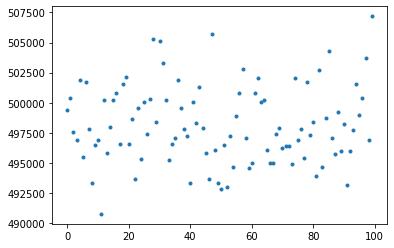

In [19]:
plt.plot(df_sn.load, '.')
plt.show()